In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_path = "/content/gdrive/MyDrive/Colab Notebooks/hydrogenase/"
else:
    file_path = "./"

%matplotlib inline

Mounted at /content/gdrive


In [2]:
# Define categories
categories = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

# Define colors for each category
color_palette = ['#1F77B4', '#bcbd22', '#D62728', '#9467BD', '#7F7F7F', '#E377C2', '#17BECF', '#FF7F0E', '#8C564B']
# Define a custom color palette
mc_colors = dict(zip(categories, color_palette))

# Set up the plotting environment
sns.set_style("ticks")
plt.rcParams.update({'font.size': 18})  # Update the font size globally

In [3]:
# Load and preprocess the main data set (Df-H2ase-CO)
data_CO = pd.read_csv(file_path+'Df-H2ase-CO.csv')
X = data_CO.drop(["Trajectory", "Binary", "Frame", "Pathway-new"], axis=1)
y = data_CO['Pathway-new']

# Split data into training and testing sets
# feature set not needed here
_, _, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Load and preprocess the H2 dataset
data_H2 = pd.read_csv(file_path+'Df-H2ase-H2.csv')
y_H2 = data_H2['Pathway-new']  # Target variable

# Load and preprocess the O2 dataset
data_O2 = pd.read_csv(file_path+'Df-H2ase-O2.csv')
y_O2 = data_O2['Pathway-new']

# Load and preprocess the NewCO dataset
data_NewCO = pd.read_csv(file_path+'Mdg-H2ase-CO.csv')
y_NewCO = data_NewCO['Pathway-new']

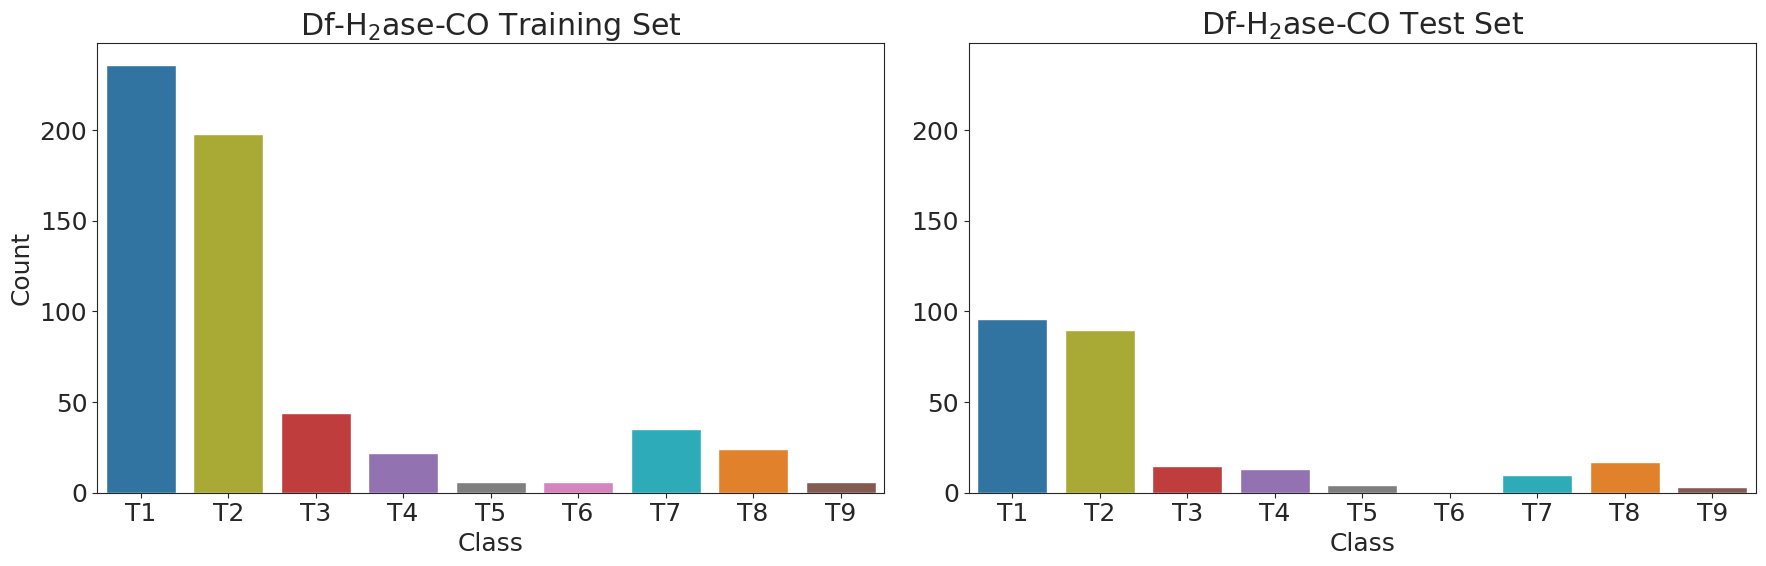

In [4]:
fig_mc_DfCO, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18,6))

sns.countplot(x=y_train, hue=y_train, order=categories, palette=mc_colors,
              legend=False, ax=axes[0])
axes[0].set_title('Df-H$_2$ase-CO Training Set')
sns.countplot(x=y_test, hue=y_test, order=categories, palette=mc_colors,
              legend=False, ax=axes[1])
axes[1].set_title('Df-H$_2$ase-CO Test Set')

for i in range(2):
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
    axes[i].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

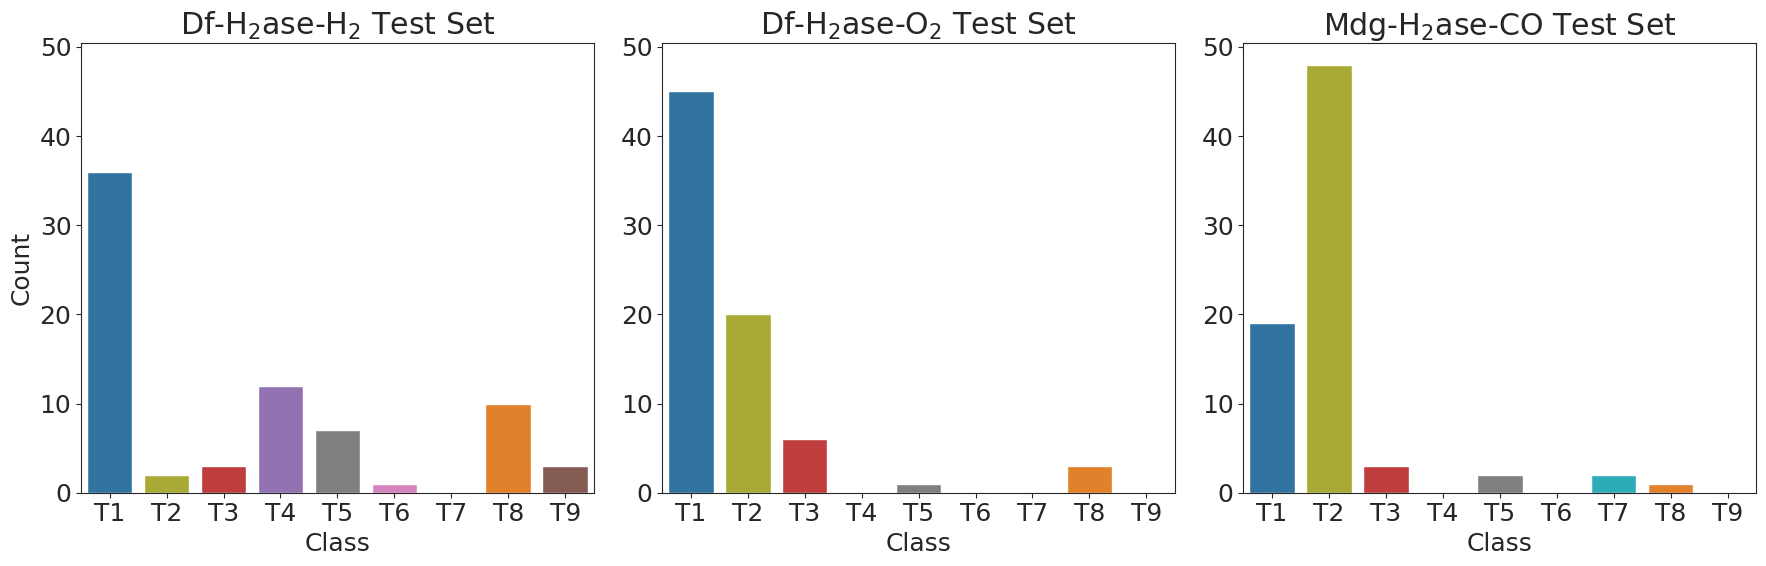

In [5]:
fig_mc_other, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,6))

sns.countplot(x=y_H2, hue=y_H2, order=categories, palette=mc_colors,
              legend=False, ax=axes[0])
axes[0].set_title('Df-H$_2$ase-H$_2$ Test Set')
sns.countplot(x=y_O2, hue=y_O2, order=categories, palette=mc_colors,
              legend=False, ax=axes[1])
axes[1].set_title('Df-H$_2$ase-O$_2$ Test Set')
sns.countplot(x=y_NewCO, hue=y_NewCO, order=categories, palette=mc_colors,
              legend=False, ax=axes[2])
axes[2].set_title('Mdg-H$_2$ase-CO Test Set')

for i in range(3):
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
    axes[i].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
# plt.savefig('Distribution-Test-Sets--.png', dpi=300, bbox_inches='tight')
plt.show()

  Class  Df-H2ase-CO-train  Df-H2ase-CO-test  Df-H2ase-H2  Df-H2ase-O2  \
0    T1                236                96           36           45   
1    T2                198                90            2           20   
2    T3                 44                15            3            6   
3    T4                 22                13           12            0   
4    T5                  6                 4            7            1   
5    T6                  6                 0            1            0   
6    T7                 35                10            0            0   
7    T8                 24                17           10            3   
8    T9                  6                 3            3            0   

   Mdg-H2ase-CO  
0            19  
1            48  
2             3  
3             0  
4             2  
5             0  
6             2  
7             1  
8             0  


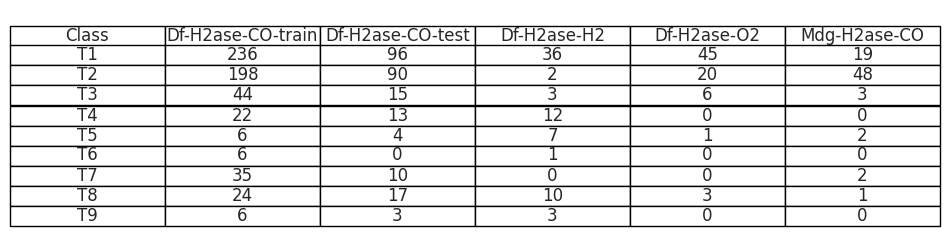

In [6]:
# Calculate the class distributions
dist_H2 = y_H2.value_counts().reindex(categories, fill_value=0).sort_index()
dist_O2 = y_O2.value_counts().reindex(categories, fill_value=0).sort_index()
dist_NewCO = y_NewCO.value_counts().reindex(categories, fill_value=0).sort_index()
dist_train = y_train.value_counts().reindex(categories, fill_value=0).sort_index()
dist_test = y_test.value_counts().reindex(categories, fill_value=0).sort_index()

# Combine these distributions into a single DataFrame
distribution_df = pd.DataFrame({
    'Class': categories,
    'Df-H2ase-CO-train': dist_train.values,
    'Df-H2ase-CO-test': dist_test.values,
    'Df-H2ase-H2': dist_H2.values,
    'Df-H2ase-O2': dist_O2.values,
    'Mdg-H2ase-CO': dist_NewCO.values,
})

# Display the DataFrame as a table
print(distribution_df)

# If you want to display the table as an image
plt.figure(figsize=(10, 3))
plt.axis('off')
table = plt.table(cellText=distribution_df.values, colLabels=distribution_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()